In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

import os

import h5py

import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
x_train = []
for i, (r, d, f) in enumerate(os.walk('C:/Users/Celia LAGARDE RAMORA/Desktop/Train/')):
    for f in f:
        i = Image.open(os.path.join(r, f))
        i = i.resize((24, 24), Image.ANTIALIAS)
        i.save(os.path.join(r, f))
        x_train.append(np.array(i))

In [3]:
x_test = []
for i, (r, d, f) in enumerate(os.walk('C:/Users/Celia LAGARDE RAMORA/Desktop/Test/')):
    for f in f:
        i = Image.open(os.path.join(r, f))
        i = i.resize((24, 24), Image.ANTIALIAS)
        i.save(os.path.join(r, f))
        x_test.append(np.array(i))

In [4]:
x_train = np.array(x_train) / 255.

In [5]:
x_test = np.array(x_test) / 255.

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = 0.2,
    fill_mode = 'constant'
)

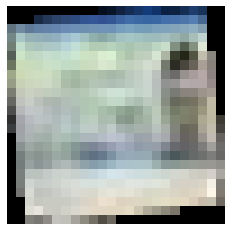

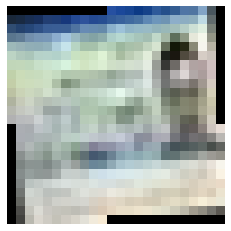

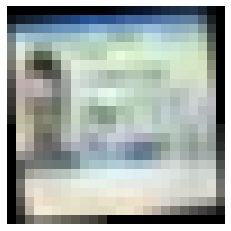

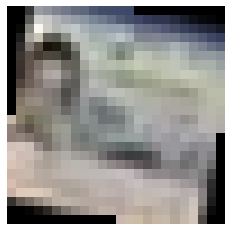

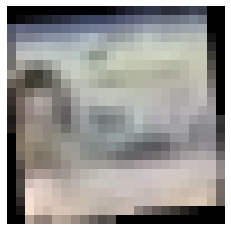

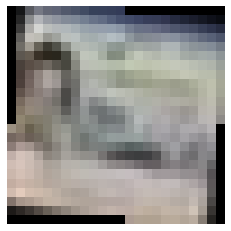

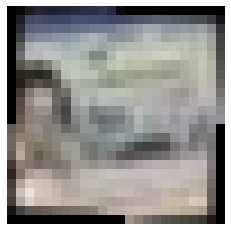

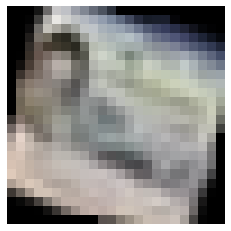

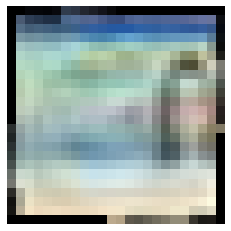

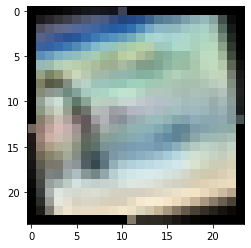

In [7]:
i = 0
for output_batch in datagen.flow(x_train, batch_size=10, shuffle=True, save_to_dir='C:/Users/Celia LAGARDE RAMORA/Desktop/Train/'):
    plt.figure()
    imgplot = plt.imshow(np.array(output_batch[0]))
    i+= 1
    
    if i==10:
        break
    plt.axis("off")
    plt.show()  

In [8]:
input = Input(shape=(x_train.reshape(-1, 24, 24, 3).shape[1:]))

_ = Conv2D(224, (3, 3), activation=keras.activations.relu)(input)
_ = MaxPooling2D((2, 2))(_)
_ = Conv2D(112, (3, 3), activation=keras.activations.relu)(_)
_ = MaxPooling2D((2, 2))(_)
_ = Conv2D(56, (3, 3), activation=keras.activations.relu)(_)
_ = UpSampling2D((3, 3))(_)
_ = Conv2D(112, (2, 2), activation=keras.activations.relu)(_)
_ = UpSampling2D((3, 3))(_)
_ = Conv2D(224, (3, 3), activation=keras.activations.relu)(_)
_ = UpSampling2D((2, 2))(_)

output = Conv2D(3, (3, 3), activation=keras.activations.sigmoid)(_)


model = Model(inputs=input, outputs=output)
model.compile(optimizer=Adam(.001), loss='mse')

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 24, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 224)       6272      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 224)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 112)         225904    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 112)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 56)          56504     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 6, 6, 56)          0   

In [9]:
from keras.callbacks import ModelCheckpoint
import datetime

dnow = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
res = 'CAE_'
mc = ModelCheckpoint('{val_loss:.6f}_'+ res + dnow + '.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


hist = model.fit(x_train, x_train, epochs=10, batch_size=10, shuffle=True, validation_data=(x_test, x_test), callbacks=[mc])

Train on 419 samples, validate on 2 samples
Epoch 1/10
419/419 [==============================] - 9s 22ms/step - loss: 0.0588 - val_loss: 0.0341

Epoch 00001: val_loss improved from inf to 0.03411, saving model to 0.034110_CAE_20200326-092735.h5
Epoch 2/10
419/419 [==============================] - 8s 19ms/step - loss: 0.0529 - val_loss: 0.0332

Epoch 00002: val_loss improved from 0.03411 to 0.03317, saving model to 0.033172_CAE_20200326-092735.h5
Epoch 3/10
419/419 [==============================] - 8s 19ms/step - loss: 0.0487 - val_loss: 0.0281

Epoch 00003: val_loss improved from 0.03317 to 0.02806, saving model to 0.028059_CAE_20200326-092735.h5
Epoch 4/10
419/419 [==============================] - 8s 19ms/step - loss: 0.0468 - val_loss: 0.0310

Epoch 00004: val_loss did not improve from 0.02806
Epoch 5/10
419/419 [==============================] - 8s 19ms/step - loss: 0.0456 - val_loss: 0.0281

Epoch 00005: val_loss did not improve from 0.02806
Epoch 6/10
419/419 [================

In [10]:
decoded_imgs = model.predict(x_test)

In [11]:
print(decoded_imgs.shape)

(2, 24, 24, 3)


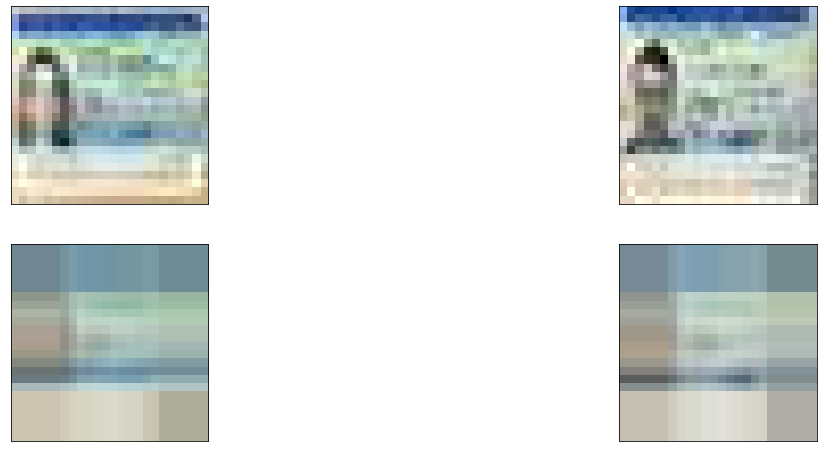

In [12]:
n = 2
plt.figure(figsize=(20,8))
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(24,24,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(24, 24,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
model = model.save('C:/Users/Celia LAGARDE RAMORA/Desktop/Autoencoder/autoencoder_CNI.h5')